In [1151]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

In [1152]:
# Load DataFrame from .csv:
with open('master_tracks_genres_2019-09-10_215018.csv', 'r') as f:
        df_master = pd.read_csv(f)

In [1153]:
df_master.shape

(54680, 26)

In [1154]:
df_master.columns

Index(['id', 'popularity', 'track_name', 'duration_ms_x', 'album_name',
       'album_id', 'artist_name', 'artist_id', 'acousticness', 'analysis_url',
       'danceability', 'duration_ms_y', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence', 'genres'],
      dtype='object')

In [1155]:
# Re-order columns within DataFrame for ease of use:
df_master = df_master[['track_name', 'artist_name', 'album_name', 'popularity',
                       'duration_ms_x', 'genres', 'id', 'album_id', 'artist_id',
                       'acousticness', 'danceability', 'energy', 'instrumentalness',
                       'liveness', 'loudness', 'speechiness', 'valence',
                       'analysis_url', 'duration_ms_y', 'key', 'mode', 'tempo',
                       'time_signature', 'track_href', 'type', 'uri']]

In [1156]:
# Split all genre strings:
genre_long_list = []
genre_names = df_master['genres']
for genre in genre_names:
    if type(genre) is str:
        if len(genre) > 0:
            genre_long_list.append(genre)
        
genre_long_list_1 = ", ".join(genre_long_list)
genre_long_list_2 = genre_long_list_1.split(", ")
print(genre_long_list_2)

['dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'a

In [1157]:
# Count unique genre strings:
c = Counter(genre_long_list_2)
print(len(list(c)))
print(list(c)[:40])

1499
['dance pop', 'pop', 'electropop', 'atl hip hop', 'atl trap', 'gangster rap', 'pop rap', 'rap', 'trap music', 'country rap', 'escape room', 'minnesota hip hop', 'trap queen', 'nc hip hop', 'post-teen pop', 'uk pop', 'chicago rap', 'conscious hip hop', 'hip hop', 'r&b', 'dfw rap', 'canadian hip hop', 'canadian pop', 'toronto rap', 'cali rap', 'southern hip hop', 'viral pop', 'boy band', 'latin', 'reggaeton', 'edm', 'tropical house', 'dmv rap', 'underground hip hop', 'vapor trap', 'alternative metal', 'art rock', 'nu metal', 'post-grunge', 'post-metal']


In [1158]:
# Split genre strings into individual words:
genre_long_words_list = []
genre_names = df_master['genres']
for genre in genre_names:
    if type(genre) is str:
        if len(genre) > 0:
            genre_long_words_list.append(genre)
        
genre_long_words_list_1 = ", ".join(genre_long_words_list)
genre_long_words_list_2 = genre_long_words_list_1.replace(",", "")
genre_long_words_list_3 = genre_long_words_list_2.split(" ")
print(genre_long_words_list_3)

['dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'atl', 'hip', 'hop', 'atl', 'trap', 'gangster', 'rap', 'pop', 'pop', 'rap', 'rap', 'trap', 'music', 'atl', 'hip', 'hop', 'atl', 'trap', 'gangster', 'rap', 'pop', 'pop', 'rap', 'rap', 'trap', 'music', 'atl', 'hip', 'hop', 'atl', 'trap', 'gangster', 'rap', 'pop', 'pop', 'rap', 'rap', 'trap', 

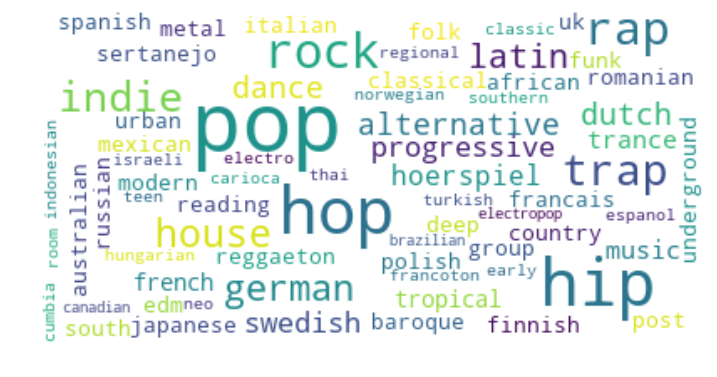

In [1159]:
# Create WordCloud of words in genres:
wordcloud = WordCloud(max_font_size=50,
                         max_words=70,
                         collocations=False,
                         background_color="white",
                     ).generate(genre_long_words_list_1)
fig, ax = plt.subplots(figsize=(12,18))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

In [1160]:
# Count unique words in genres and print most common:
c = Counter(genre_long_words_list_3)
print(len(list(c)))
print(c.most_common(40))

922
[('pop', 23666), ('hip', 14475), ('hop', 14415), ('rock', 6800), ('rap', 6387), ('trap', 5488), ('indie', 4760), ('house', 4077), ('german', 3758), ('latin', 3178), ('dutch', 2683), ('alternative', 2535), ('dance', 2439), ('swedish', 2287), ('progressive', 2245), ('hoerspiel', 2068), ('r&b', 2024), ('trance', 1887), ('music', 1852), ('tropical', 1702), ('french', 1642), ('francais', 1454), ('deep', 1377), ('classical', 1373), ('modern', 1354), ('edm', 1319), ('italian', 1309), ('urban', 1284), ('australian', 1223), ('sertanejo', 1192), ('polish', 1155), ('j-pop', 1121), ('mexican', 1102), ('country', 1092), ('metal', 1070), ('baroque', 1067), ('south', 1058), ('k-pop', 1040), ('funk', 1038), ('african', 985)]


In [1161]:
# 12 somewhat subjectively chosen genre categories for further analysis:
genre_split_list = ['pop','hip','rock','rap','trap','indie','house','latin',\
                    'alternative','r&b','trance','edm']

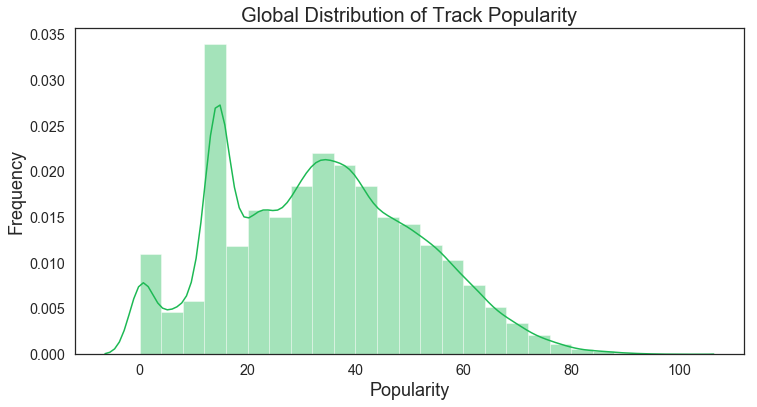

In [1162]:
# Plot overall distribution of track popularity scores:
sns.set(font_scale=1.3)
sns.set_style("white")
ax1 = plt.subplots(figsize=(12, 6))
ax1 = sns.distplot(df_master['popularity'], bins=25, color='#1DB954')
ax1.set_xlabel('Popularity',fontsize=18)
ax1.set_ylabel('Frequency',fontsize=18)

ax1.set_title("Global Distribution of Track Popularity",\
             fontsize=20);

In [1163]:
# Find score value for 80% popularity cutoff:
popularity_cutoff = df_master['popularity'].quantile(q=0.8)
print(popularity_cutoff)

50.0


In [1164]:
# Add binary column to DataFrame showing whether track is in top 20% of popularity:
df_master['is_popular'] = np.where(df_master['popularity']>=popularity_cutoff, 1, 0)

In [1165]:
# Drop NaN rows, lose approx. 20% of data.
df_drop_genres = df_master.dropna()

In [1166]:
# Show most popular song in data set:
df_drop_genres.sort_values('popularity', ascending=False).head(1)

track_name   artist_name album_name  popularity  duration_ms_x  \
301   Señorita  Shawn Mendes   Señorita         100         190960   

                           genres                      id  \
301  canadian pop, pop, viral pop  0TK2YIli7K1leLovkQiNik   

                   album_id               artist_id  acousticness     ...      \
301  2ZaX1FdZCwchXl1QZiD4O4  7n2wHs1TKAczGzO7Dd2rGr         0.037     ...       

                                          analysis_url  duration_ms_y  key  \
301  https://api.spotify.com/v1/audio-analysis/0TK2...         190960    9   

     mode    tempo  time_signature  \
301     0  116.947               4   

                                            track_href            type  \
301  https://api.spotify.com/v1/tracks/0TK2YIli7K1l...  audio_features   

                                      uri  is_popular  
301  spotify:track:0TK2YIli7K1leLovkQiNik           1  

[1 rows x 27 columns]

In [1167]:
# Create separate DataFrames for each genre for future analysis:
for genre in genre_split_list:
    genre = df_drop_genres[df_drop_genres['genres'].str.contains(genre)]

In [1168]:
df_pop = df_drop_genres[df_drop_genres['genres'].str.contains('pop')]

In [1169]:
df_trance = df_drop_genres[df_drop_genres['genres'].str.contains('trance')]

In [1170]:
df_trap = df_drop_genres[df_drop_genres['genres'].str.contains('trap')]

In [1171]:
genre_track_counts_total = [len(df_drop_genres[df_drop_genres['genres'].str.contains(genre)]) for \
                                 genre in genre_split_list]
print(temp_counts_total)

[18570, 11853, 4554, 7893, 5046, 3973, 2743, 1864, 2472, 1504, 957, 1179]


In [1172]:
genre_track_counts_popular = [len(df_drop_genres[(df_drop_genres['genres'].str.contains(genre)) & \
                                   (df_drop_genres['is_popular'] == 1)]) for \
                                 genre in genre_split_list]
print(temp_counts_popular)

[5652, 3822, 860, 3190, 2143, 1029, 600, 702, 677, 554, 20, 422]


In [1173]:
genre_track_counts_unpopular = [len(df_drop_genres[(df_drop_genres['genres'].str.contains(genre)) & \
                                   (df_drop_genres['is_popular'] == 0)]) for \
                                 genre in genre_split_list]
print(temp_counts_unpopular)

[12918, 8031, 3694, 4703, 2903, 2944, 2143, 1162, 1795, 950, 937, 757]


In [1174]:
gen_argsort = np.argsort(genre_track_counts_total)[::-1]

In [1175]:
genre_track_counts_total_sort = [genre_track_counts_total[idx] for idx in gen_argsort]
print(genre_track_counts_total_sort)

[18570, 12226, 7893, 5046, 4554, 3973, 2743, 2472, 1864, 1504, 1179, 957]


In [1176]:
genre_track_counts_unpopular_sort = [genre_track_counts_unpopular[idx] for idx in gen_argsort]
print(genre_track_counts_unpopular_sort)

[12918, 8318, 4703, 2903, 3694, 2944, 2143, 1795, 1162, 950, 757, 937]


In [1177]:
genre_track_counts_popular_sort = [genre_track_counts_popular[idx] for idx in gen_argsort]
print(genre_track_counts_popular_sort)

[5652, 3908, 3190, 2143, 860, 1029, 600, 677, 702, 554, 422, 20]


In [1178]:
genre_split_list_sort = [genre_split_list[idx] for idx in gen_argsort]
print(genre_split_list_sort)

['pop', 'hip', 'rap', 'trap', 'rock', 'indie', 'house', 'alternative', 'latin', 'r&b', 'edm', 'trance']


In [1179]:
genre_labels_pretty = ['Pop', 'Hip-Hop', 'Rap', 'Trap', 'Rock', 'Indie', 'House', 'Alternative', 'Latin', 'R&B', 'EDM', 'Trance']

In [1180]:
popularity_ratios = [x/y*100 for x, y in zip(genre_track_counts_popular_sort, genre_track_counts_total_sort)]

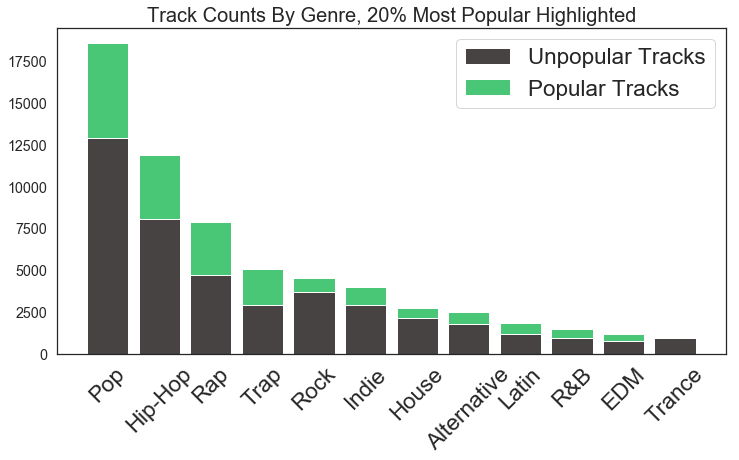

In [1181]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

x_values = genre_labels_pretty
ax1.bar(x_values, temp_counts_unpopular_sort, color='#191414CC', edgecolor='#FFFFFF',
            label="Unpopular Tracks")
ax1.bar(x_values, temp_counts_popular_sort, bottom=temp_counts_unpopular_sort, \
             color='#1DB954CC', edgecolor='#FFFFFF', label="Popular Tracks")
plt.xticks(rotation=45, fontsize = 'x-large')
ax1.legend(fontsize = 'x-large')
ax1.set_title("Track Counts By Genre, 20% Most Popular Highlighted",\
             fontsize=20)
plt.show();

In [1182]:
popularity_ratios = [x/y*100 for x, y in zip(genre_track_counts_popular_sort, genre_track_counts_total_sort)]
popularity_ratios_format = ["%.2f" % num for num in popularity_ratios]
print(popularity_ratios)
print(popularity_ratios_format)

[30.436187399030697, 31.964665467037463, 40.41555808944635, 42.469282600079275, 18.884497145366712, 25.899823810722378, 21.873860736419978, 27.386731391585762, 37.66094420600859, 36.83510638297872, 35.7930449533503, 2.089864158829676]
['30.44', '31.96', '40.42', '42.47', '18.88', '25.90', '21.87', '27.39', '37.66', '36.84', '35.79', '2.09']


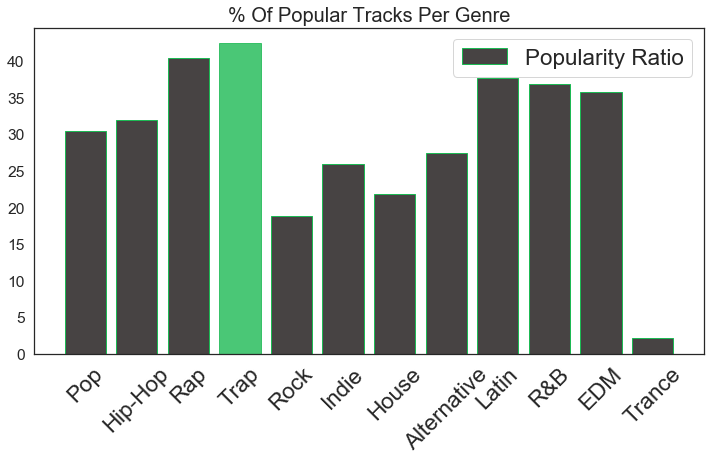

In [1183]:
x_values = genre_labels_pretty
ax = plt.subplots(figsize=(12, 6))
ax = plt.bar(x_values, popularity_ratios, color='#191414CC', edgecolor='#1DB954',
            label="Popularity Ratio")
ax[3].set_color('#1DB954CC')
plt.xticks(rotation=45, fontsize = 'x-large')
plt.yticks(fontsize = 'medium')
plt.legend(fontsize = 'x-large')

plt.title("% Of Popular Tracks Per Genre", fontsize=20)

plt.show()

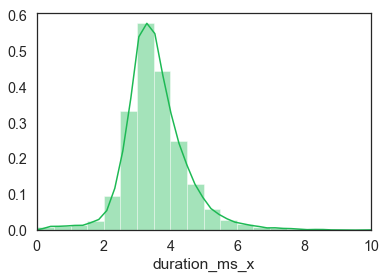

In [1184]:
ax = sns.distplot(df_pop['duration_ms_x']/60000, bins=60, color='#1DB954')
ax.set(xlim=(0, 10));

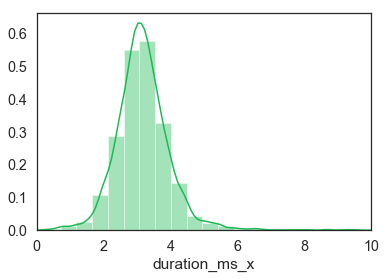

In [1185]:
ax = sns.distplot(df_trap['duration_ms_x']/60000, bins=25, color='#1DB954')
ax.set(xlim=(0, 10));

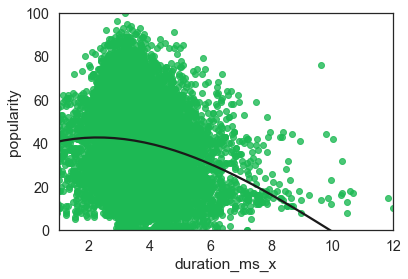

In [1186]:
ax = sns.regplot(df_pop['duration_ms_x']/60000, df_pop['popularity'], color='#1DB954', ci=None, order=3, 
                 line_kws={'color':'k'})
ax.set(xlim=(1, 12), ylim=(0, 100));

In [1187]:
pop_outlier = df_pop.loc[(df_pop['duration_ms_x']/60000 > 8) \
                         & (df_pop['popularity'] > 60)]

print(f"Artist: {pop_outlier['artist_name']} Track: {pop_outlier['track_name']}")

Artist: 341    Lana Del Rey
Name: artist_name, dtype: object Track: 341    Venice Bitch
Name: track_name, dtype: object


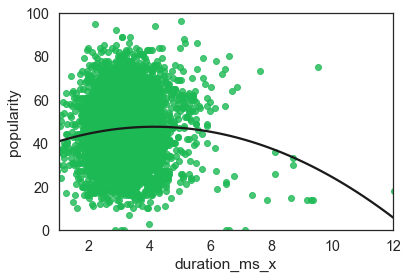

In [1188]:
ax = sns.regplot(df_trap['duration_ms_x']/60000, df_trap['popularity'], \
                 color='#1DB954', ci=None, order=2, line_kws={'color':'k'})
ax.set(xlim=(1, 12), ylim=(0, 100));

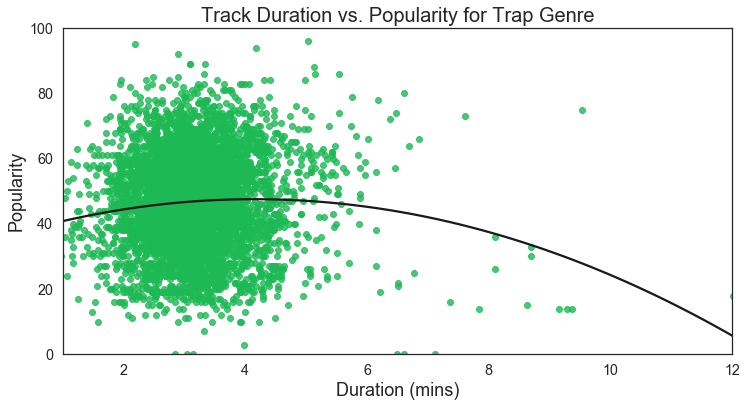

In [1189]:
sns.set(font_scale=1.3)
sns.set_style("white")
ax = plt.subplots(figsize=(12, 6))
ax = sns.regplot(df_trap['duration_ms_x']/60000, df_trap['popularity'],
                 color='#1DB95455', ci=None, order=2, line_kws={'color':'k'})
ax.set_xlabel('Duration (mins)',fontsize=18)
ax.set_ylabel('Popularity',fontsize=18)
ax.set(xlim=(1, 12), ylim=(0, 100))
ax.set_title("Track Duration vs. Popularity for Trap Genre",
             fontsize=20);


In [1190]:
trap_outlier = df_trap.loc[(df_trap['duration_ms_x']/60000 > 8) \
                         & (df_trap['popularity'] > 60)]

print(f"Long, Popular Trap Outlier:\n  Artist: {trap_outlier['artist_name'].iloc[0]}\n\
  Track: {trap_outlier['track_name'].iloc[0]}")

Long, Popular Trap Outlier:
  Artist: Pineapple StormTv
  Track: Poesia Acústica #7: Céu Azul


In [1191]:
trap_outlier_short = df_trap.loc[(df_trap['duration_ms_x']/60000 < 2.2) \
                         & (df_trap['popularity'] > 90)]
print(f"Short, Popular Trap Outlier:\n  Artist: {trap_outlier_short['artist_name'].iloc[0]}\n\
  Track: {trap_outlier_short['track_name'].iloc[0]}")

Short, Popular Trap Outlier:
  Artist: Lil Tecca
  Track: Ransom


In [1192]:
#trap_outlier_short
#https://p.scdn.co/mp3-preview/f168e21bd3e462fb086e8c2cb6064249d4c8e966?cid=3bb746dbeccf420f9210e16d14c951f3

In [1193]:
df_trap.sort_values('popularity', ascending=False).head(7)

track_name artist_name  \
821                                       China    Anuel AA   
195                                      Ransom   Lil Tecca   
904                                    Callaita   Bad Bunny   
71                                  Truth Hurts       Lizzo   
699       Loco Contigo (feat. J. Balvin & Tyga)    DJ Snake   
2478       Loco Contigo (with J. Balvin & Tyga)    DJ Snake   
457   The London (feat. J. Cole & Travis Scott)  Young Thug   

                                album_name  popularity  duration_ms_x  \
821                                  China          96         301714   
195                                 Ransom          95         131280   
904                               Callaita          94         250533   
71                 Cuz I Love You (Deluxe)          92         173325   
699                          Carte Blanche          89         185194   
2478  Loco Contigo (with J. Balvin & Tyga)          89         185194   
457                             The London          89         200106   

                                                 genres  \
821                         reggaeton flow, trap latino   
195                                          trap music   
904                              reggaeton, trap latino   
71      escape room, minnesota hip hop, pop, trap queen   
699                                edm, electronic trap   
2478                               edm, electronic trap   
457   atl hip hop, atl trap, gangster rap, pop, pop ...   

                          id                album_id               artist_id  \
821   2ksOAxtIxY8yElEWw8RhgK  1PTTAq0OxggVgqP5WTYWDh  2R21vXR83lH98kGeO99Y66   
195   1kBbgxAUc4HQv7cgIayIDH  4Mz9ZCE83IiaVC9ejMqxky  4Ga1P7PMIsmqEZqhYZQgDo   
904   2TH65lNHgvLxCKXM3apjxI  06S3Qjh4QWLtn6c7CVhYh7  4q3ewBCX7sLwd24euuV69X   
71    5qmq61DAAOUaW8AUo8xKhh  74gSdSHe71q7urGWMMn3qB  56oDRnqbIiwx4mymNEv7dS   
699   6osaMSJh9NguagEDQcZaKx  2MFS6WG6jnPAgvJpV3PehR  540vIaP2JwjQb9dm3aArA4   
2478  1f38Gx6xQz6r4H1jGVNBJo  3HXHo0qkSUO4M9p6PEnA01  540vIaP2JwjQb9dm3aArA4   
457   7DcvwMAiqKJQD1rrdfxSDx  6p9Y1K9yu3ojyS8fBJXUnp  50co4Is1HCEo8bhOyUWKpn   

      acousticness     ...      \
821         0.0846     ...       
195         0.0204     ...       
904         0.6000     ...       
71          0.1100     ...       
699         0.2760     ...       
2478        0.2850     ...       
457         0.0247     ...       

                                           analysis_url  duration_ms_y  key  \
821   https://api.spotify.com/v1/audio-analysis/2ksO...         301714    7   
195   https://api.spotify.com/v1/audio-analysis/1kBb...         131280    7   
904   https://api.spotify.com/v1/audio-analysis/2TH6...         250534    2   
71    https://api.spotify.com/v1/audio-analysis/5qmq...         173325    4   
699   https://api.spotify.com/v1/audio-analysis/6osa...         185195    6   
2478  https://api.spotify.com/v1/audio-analysis/1f38...         185195    6   
457   https://api.spotify.com/v1/audio-analysis/7Dcv...         200107    4   

      mode    tempo  time_signature  \
821      1  105.027               4   
195      0  179.974               4   
904      1  176.169               4   
71       0  158.087               4   
699      0   96.024               4   
2478     0   96.025               4   
457      0   97.981               4   

                                             track_href            type  \
821   https://api.spotify.com/v1/tracks/2ksOAxtIxY8y...  audio_features   
195   https://api.spotify.com/v1/tracks/1kBbgxAUc4HQ...  audio_features   
904   https://api.spotify.com/v1/tracks/2TH65lNHgvLx...  audio_features   
71    https://api.spotify.com/v1/tracks/5qmq61DAAOUa...  audio_features   
699   https://api.spotify.com/v1/tracks/6osaMSJh9Ngu...  audio_features   
2478  https://api.spotify.com/v1/tracks/1f38Gx6xQz6r...  audio_features   
457   https://api.spotify.com/v1/tracks/7DcvwMAiqKJQ...  audio_features   

             

In [1194]:
df_trap_audio_features = df_trap[['id', 'popularity', 'duration_ms_x', 'acousticness',
                            'danceability', 'energy', 'instrumentalness', 'liveness',
                            'loudness', 'speechiness', 'tempo', 'valence']].copy()
df_trap_audio_features.head()

id  popularity  duration_ms_x  acousticness  \
32  5KYhIFNTp4VQUqlsbLWTTu          74         207133      0.048500   
33  0zNHMc1cGKe4MO5rtGtKRh          74         238026      0.000786   
34  1yBbxDXEfr8boXM1ubvBHi          72         178240      0.000541   
35  5Z8HZM6iQMhhqyPcCGY5g9          83         193026      0.063000   
36  41mzryVlFLlz6b1BCtJAjx          72         209253      0.003890   

    danceability  energy  instrumentalness  liveness  loudness  speechiness  \
32         0.611   0.539             0.000    0.1270   -10.617       0.4110   
33         0.874   0.552             0.286    0.1440    -7.951       0.2710   
34         0.826   0.691             0.000    0.1570    -6.557       0.1290   
35         0.855   0.651             0.000    0.0772    -8.044       0.2350   
36         0.953   0.515             0.000    0.1100    -8.546       0.0846   

      tempo  valence  
32   82.766    0.627  
33  147.043    0.521  
34  162.966    0.603  
35  111.997    0.559  
36  138.039    0.351

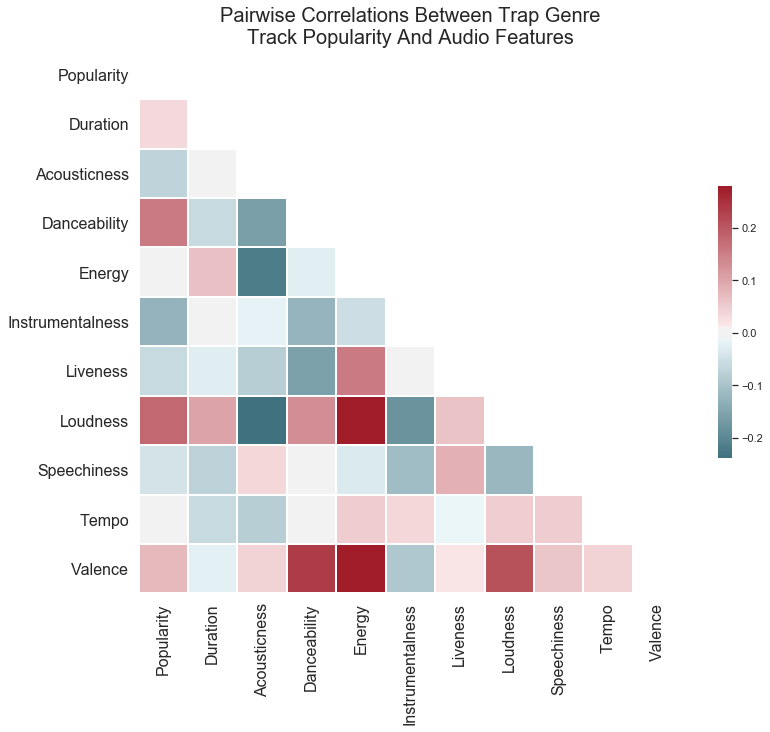

In [1195]:
# Credit: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")

# Compute the correlation matrix
corr = df_trap_audio_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

labels = ['Popularity', 'Duration', 'Acousticness', 'Danceability', 'Energy',
          'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))
ax.tick_params(labelsize=16)
ax.set_title("Pairwise Correlations Between Trap Genre\nTrack Popularity And Audio Features",\
             fontsize=20)


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, s=85, l=35, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, xticklabels=labels, yticklabels=labels, mask=mask, cmap=cmap, 
            vmax=.28, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5});

In [1196]:
df_trap_sorted_dance = df_trap.sort_values('danceability', ascending=False)

print(f"Most Danceable Trap Song:\n  Artist: {df_trap_sorted_dance['artist_name'].iloc[0]}\n\
  Track: {df_trap_sorted_dance['track_name'].iloc[0]}")

Most Danceable Trap Song:
  Artist: ROCKET
  Track: Хит
